In [28]:
import sys
import os

__file__ = "/Users/jmfrutos/github/ISL-python/ISL/examples"
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '..')))  # Add parent directory to path

from isl import invariant_statistical_loss, auto_invariant_statistical_loss
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.distributions import Normal, Pareto
from torch.utils.data import DataLoader, TensorDataset

In [29]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 7),
            nn.ELU(),
            nn.Linear(7, 13),
            nn.ELU(),
            nn.Linear(13, 7),
            nn.ELU(),
            nn.Linear(7, 1)
        )

    def forward(self, x):
        return self.model(x)

In [31]:
noise_model = Normal(0.0, 1.0)  # Custom noise model required
target_model = Normal(5.0, 2.0)  # Custom target model required
gen = Generator()

In [32]:
# Hyperparameters for Auto Invariant Statistical Loss
hparams = {
    'max_k': 10,
    'samples': 1000,
    'epochs': 1000,
    'eta': 1e-2,
    'transform': noise_model,
    'K': 10
}

In [33]:
def sample_from_target_model(target_model, num_samples):
    # Sample from the target_model here
    # This is a placeholder for your actual implementation
    # For example, if target_model is a normal distribution:
    samples = torch.normal(5.0, 2.0, size=(num_samples, 1))
    return samples

In [37]:
# Generate the training dataset
num_total_samples = hparams['samples'] * hparams['epochs']
train_data = sample_from_target_model(target_model, num_total_samples)

# Assuming the train_data is a 1D tensor, reshape it to 2D (num_samples, num_features) if necessary
# If train_data is already 2D (num_samples, num_features), you can skip the reshaping
#train_data = train_data.view(-1, 1)

# Create a DataLoader
# Note: In PyTorch, the DataLoader expects a dataset object, so we wrap our data in a TensorDataset
#dataset = TensorDataset(train_data)  # Using train_data as both inputs and targets for simplicity
loader = DataLoader(train_data, batch_size=hparams['samples'], shuffle=True)

# Train the model
# Assuming 'gen' is your model and 'auto_invariant_statistical_loss' is defined as per your previous messages
#losses = invariant_statistical_loss(gen, loader, hparams)

hparams = {
    'max_k': 10,
    'samples': 1000,
    'epochs': 1000,
    'eta': 1e-2,
    'transform': noise_model,
    'K': 10
}

losses = auto_invariant_statistical_loss(gen, loader, hparams)

K value set to 2.


 22%|██▏       | 218/1000 [02:34<09:15,  1.41it/s]

K value set to 3.


 86%|████████▌ | 857/1000 [11:51<02:03,  1.16it/s]

K value set to 4.


100%|██████████| 1000/1000 [14:20<00:00,  1.16it/s]


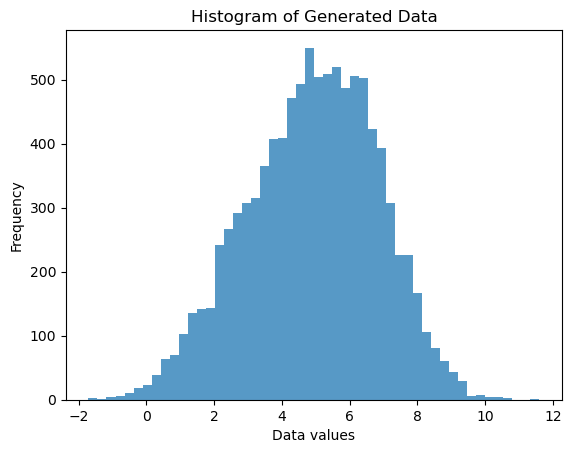

In [39]:
#Plot the results

import matplotlib.pyplot as plt
import torch

# Assuming 'model' is your trained model and 'noise' is the input for the model
# Generating data
noise = torch.normal(0.0, 1.0, size=(10000, 1))
gen.eval()  # Set the gen to evaluation mode
with torch.no_grad():  # Turn off gradients for evaluation
    generated_data = gen(noise).detach().cpu().numpy()  # Convert to NumPy array

# Plotting the histogram
import matplotlib.pyplot as plt

plt.hist(generated_data, bins=50, alpha=0.75)  # Adjust the number of bins as needed
plt.title('Histogram of Generated Data')
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.show()